<a href="https://colab.research.google.com/github/Abdulnaser98/House-Price-prediction/blob/main/HousPriceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Overwiew***:

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
import pylab
import missingno
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import missingno as msno
import plotly.express as px 
import scipy.stats as  stats
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from   scipy.special import boxcox1p
from   statsmodels.formula.api import ols
from   sklearn.pipeline import make_pipeline
from   sklearn.kernel_ridge import KernelRidge
from   sklearn.preprocessing import RobustScaler
from   sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from   sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from   sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score
from   sklearn.model_selection import cross_val_score,KFold,GridSearchCV,train_test_split
from   sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV,Lasso, LassoLarsCV,BayesianRidge,LassoLarsIC


 

pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',2000)
pd.options.display.float_format = '{:.2f}'.format

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive 
drive.mount("/content/gdrive" )

Mounted at /content/gdrive


In [3]:
 %cd /content/gdrive/MyDrive/kaggledataset/
 os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/kaggledataset/"

/content/gdrive/MyDrive/kaggledataset


In [10]:
#read data into dataframes
training_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")

In [ ]:
print("Training data has the shape : {} ".format(training_data.shape) )
print("{} rows and {} columns  \n\n".format(training_data.shape[0],training_data.shape[1] ) )

print("Testing data has the shape : {} ".format(testing_data.shape) )
print("{} rows and {} columns".format(testing_data.shape[0],testing_data.shape[1] ) )


Training data has the shape : (1460, 81) 
1460 rows and 81 columns  


Testing data has the shape : (1459, 80) 
1459 rows and 80 columns


In [ ]:
training_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
testing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Do we need the feature Id in both datasets ? 
No , beacuse it does not contribute in predicting the sales price, so we will drop it. 

In [5]:
training_data = training_data.drop('Id', 1)
testing_data  = testing_data.drop('Id',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [13]:
#MSSubClass=The building class
training_data['MSSubClass'] = training_data['MSSubClass'].apply(str)
testing_data['MSSubClass'] = testing_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
training_data['OverallCond'] = training_data['OverallCond'].astype(str)
testing_data['OverallCond'] = testing_data['OverallCond'].astype(str)

training_data['OverallQual'] = training_data['OverallQual'].astype(str)
testing_data['OverallQual'] = testing_data['OverallQual'].astype(str)
 

#Year and month sold are transformed into categorical features.
training_data['YrSold'] = training_data['YrSold'].astype(str)
testing_data['YrSold'] = testing_data['YrSold'].astype(str)
training_data['MoSold'] = training_data['MoSold'].astype(str)
testing_data['MoSold'] = testing_data['MoSold'].astype(str)

training_data['Utilities'] = training_data['Utilities'].astype(str)

In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

training_data_num = training_data.select_dtypes(include=numerics)
training_data_cat = training_data.select_dtypes(include="object")
print("Training data has {} numerical features and {} Categorigcal features ".format( len(training_data_num.columns), len(training_data_cat.columns)  ) )

#print(len(training_data_cat.columns ))

testing_data_num = testing_data.select_dtypes(include=numerics)
testing_data_cat = testing_data.select_dtypes(include="object")
print("Testing data has {} numerical features and {} Categorigcal features ".format( len(testing_data_num.columns), len(testing_data_cat.columns)  ) )


Training data has 38 numerical features and 43 Categorigcal features 
Testing data has 37 numerical features and 43 Categorigcal features 


In [8]:
training_data_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

# ***Outliers***

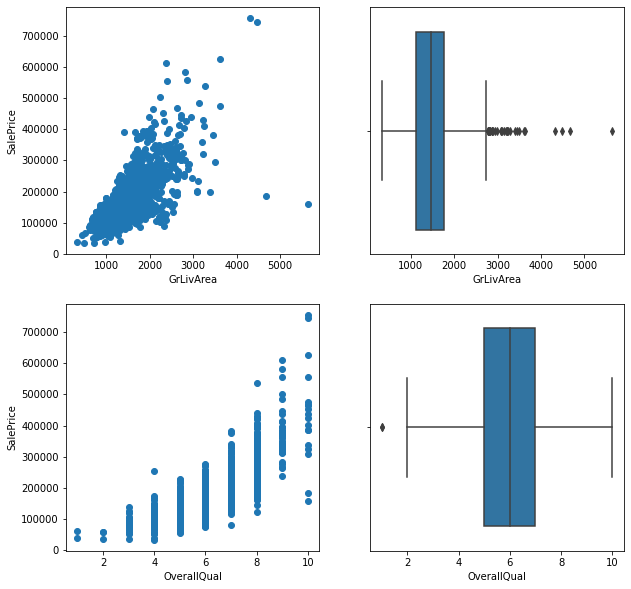

In [12]:
fig = plt.figure(figsize=(10, 10))
a = 2
b = 2
c = 1

for col in ["GrLivArea","OverallQual"] : 
 
    plt.subplot(a,b,c) 
    plt.scatter( x = training_data_num[col], y = training_data["SalePrice"] )
    plt.xlabel(col)
    plt.ylabel("SalePrice"); 
    c = c + 1

    plt.subplot(a,b,c)
    sns.boxplot( x = training_data_num[col])
    c = c + 1
    
     
    
plt.show()   
    

**Obsdrvations:**

  a) **GrLivArea** has strong correlation with salceprice and it can be seen that there are two data points that have high area and  far away from the mean and have low price.. Those are definitly outliers 

  b) **Overallqual**  has also two data points that are very high 10 and have low salceprice.

In [14]:
#get indices of outliers
training_data.query("GrLivArea > 4000 or ( OverallQual == 10 and SalePrice < 200000  )") 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.00,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.00,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.00,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.00,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.00,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.00,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.00,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.00,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.00,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.00,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.00,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.00,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [ ]:
training_data = training_data.drop(training_data.index[[523,691,1182,1298]])

***Note***:
It can be the case that there are other outliers, but we cannot just delet them; because we may think the values are outliers but in reality they represent an under sampled part of the data and so if we throw them out our model only represents part of the real data and can not predict a significant portion of reality. 
in the cases above , i delted the outliers , because it is obvious that they are outliers.




---



# ***Handling missing data***

In [15]:
training_data_missing = training_data.loc[:, training_data.isna().any()] 
testing_data_missing  = testing_data.loc[:, testing_data.isna().any()]

print("Training data has : {} columns that have missing values".format(len(training_data_missing.columns)))
print("The columns are : {} \n\n".format(training_data_missing.columns))

print("Testing data has : {} columns that have missing values".format(len(testing_data_missing.columns)))
print("The columns are : {} ".format(testing_data_missing.columns))

Training data has : 19 columns that have missing values
The columns are : Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object') 


Testing data has : 33 columns that have missing values
The columns are : Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='obje

Testing data has more columns that have missing values..nearly double the number that traing data has.

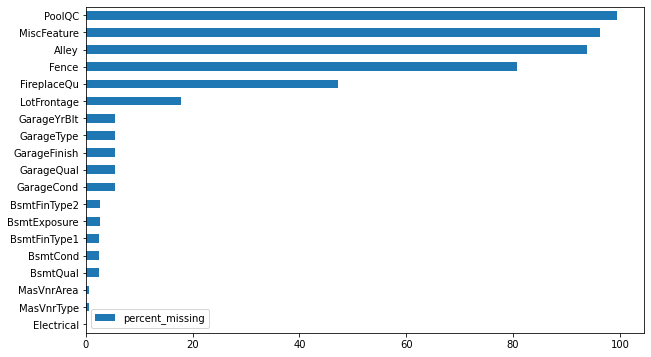

In [16]:
#training data
( training_data.isnull().sum() * 100 / len(training_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));

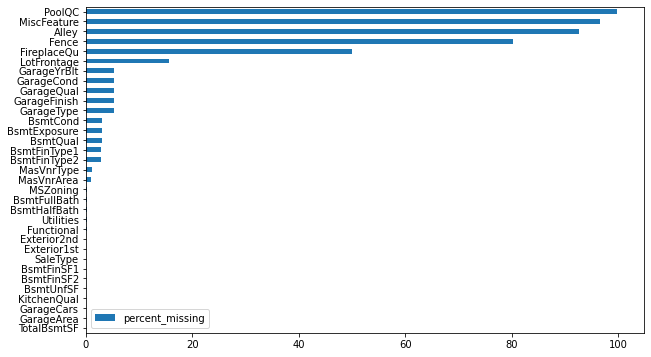

In [17]:
  #testing data
  ( testing_data.isnull().sum() * 100 / len(testing_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));

Each of the follwoing columns PoolQC, MiscFeature, Alley, FireplaceQu have more than 50 percent missing values and we need to explore them to know why they have so much missing values. 

*   **PoolQC** is connected with **PoolArea**
 


---




*   **PoolQC**: Pool quality
            Pool area:  
            it has the value 0 (there is no pool) for more than 1200 rows and
            this the reason , why there are alot of missing values in 
            the column(PoolQC)
            Even though most houses has not pool, i would not consider it 
            good idea to drop the column, because the houses that have pool 
            tend to have very high prices and if i was to drop this column, the
            model would not represent this part of the reality.


*   **MiscFeature**: Miscellaneous feature not covered in other categories 
                 it is expeted that this column has a lot of missing 
                 values,as most observed houses have no elevator , second 
                 garage or any feature that not coverd.  
                 i would not drop this column , because of the same argument 
                 written above for the column **PoolQu**.
                 houses with elevator or second garage tend to have high prices
                 and this part of reality should be represented.


*   **Alley** : Type of alley access to property(Gravel,Paved or No alley access)
                i would drop this column, because i dont see how the alley 
                access type would influces the sale price.
*   **Fence** : Fence quality
                i would say , it does make scence that this column has so 
                much data , as alot of houses has not fence , so instead of 
                saying that the values are missing , we can say that so wenig
                houses has fences.   
                The same argument written above for PoolQu is valid also for 
                this Feature 


               
              

 


Imputing **PoolQu**, **MiscFeature** and **Fence**.

In [18]:
# accprding to the description of this feature "NA" means No Pool
training_data["PoolQC"] = training_data["PoolQC"].fillna("NA")
testing_data["PoolQC"] = testing_data["PoolQC"].fillna("NA")

#according to the description of this feature "NA"	means there is no miscellaneous feature not covered in other categories
training_data["MiscFeature"] = training_data["MiscFeature"].fillna("NA")
testing_data["MiscFeature"] = testing_data["MiscFeature"].fillna("NA")

#according to the description of this feature "NA"	means there is No Fence
training_data["Fence"] = training_data["Fence"].fillna("NA")
testing_data["Fence"] = testing_data["Fence"].fillna("NA")
 

Droping **Alley**

In [19]:
training_data.drop(['Alley'],axis=1, inplace = True) 
testing_data.drop(['Alley'],axis=1, inplace = True) 

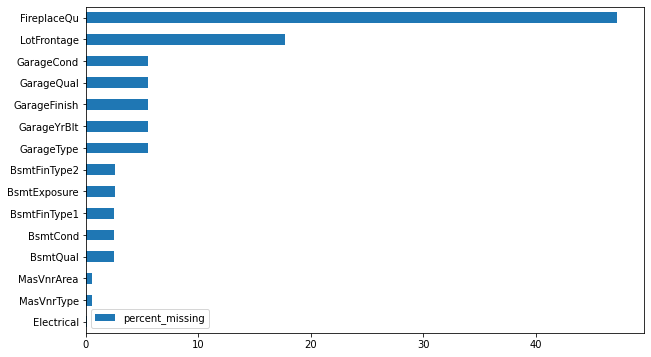

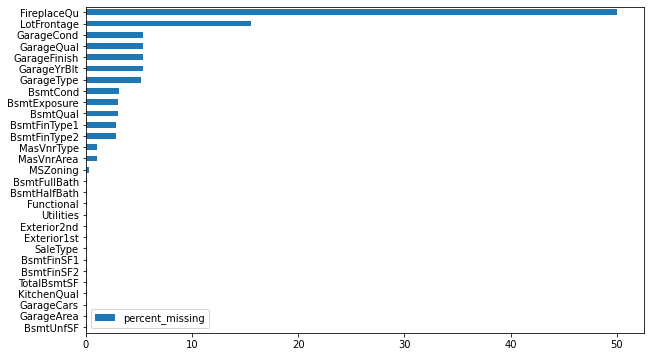

In [20]:
( training_data.isnull().sum() * 100 / len(training_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));
( testing_data.isnull().sum() * 100 / len(testing_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));


*   **FireplaceQu**: Fireplace quality
                     Fireplaces: Number of fireplaces
                     it can be said that FireplaceQu is connected with 
                     Fireplaces where if a house has fireplaces then the values
                     Fireplace is not missing , on the other hand if the 
                     number of fire places is 0 , then the value of 
                     FireplaceQu is missing.
                      

    



In [21]:
#check , whether fireplacequality is not NAN , when  fireplaces is greater than 0 ... in another words to check ,whether there were fireplaces for which was forgotten to write the quality

training_data.query("( FireplaceQu != FireplaceQu ) and Fireplaces>0" )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


It turns out there if the number of fireplaces is greater than zero , then the quality should be written and if there is no fireplace then the quality is written as NAN.
Therfore we will not impute the missing values in Fireplacequ by the most common one , but by "NA".
If we imput inpute this column by the most occuring , then there will be alot of rows where there the quality of fireplace is written and in the same time there is no fireplace in the house.

Impute **Fireplacequ**

In [22]:
#according to the description of this feature "NA"	means there is No Fireplace
training_data["FireplaceQu"] = training_data["FireplaceQu"].fillna("NA")
testing_data["FireplaceQu"] = testing_data["FireplaceQu"].fillna("NA")

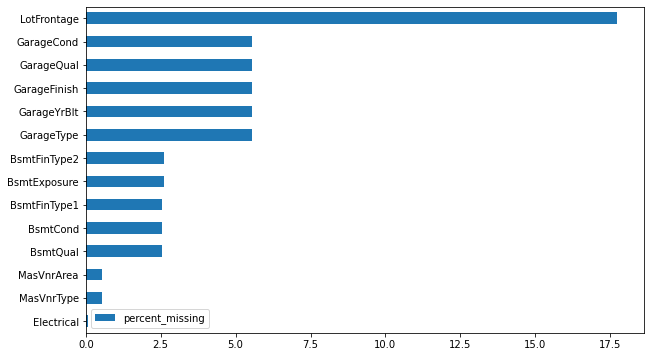

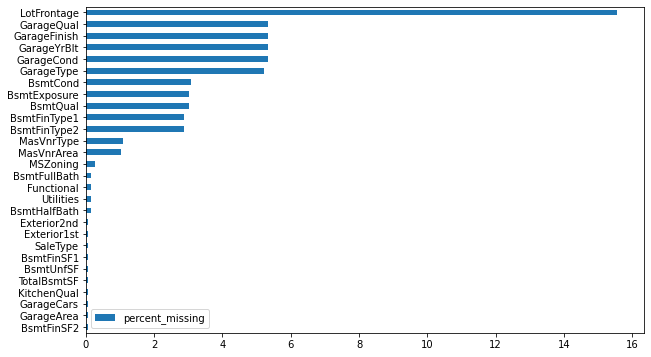

In [23]:
( training_data.isnull().sum() * 100 / len(training_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));
( testing_data.isnull().sum() * 100 / len(testing_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));

 

*   **LotFrontage**: Linear feet of street connected to property.

                     *   **Neighborhood**: physical locations within Ames city limits.
                         we all know that there specific neighborhoods , where
                         the lotfrontage is very high and on the other hand 
                         there are neighborhood , where the lotfrontage is very
                         low, therforet the feature neighborhood should be 
                         taken into consideration , when we imput input 
                         lotfrontage.

                     *   **LotArea**: Lot size in square feet
                         when calculating the LotArea the Lotfrontage should be
                         multiplyed by another number to calculate Lotarea , 
                         therefore when Lotfrontage is high , lotarea is also
                         relativly high.


                      
    



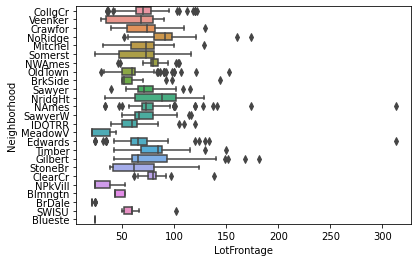

In [24]:
sns.boxplot( x = training_data["LotFrontage"], y=training_data["Neighborhood"])

It can be viewed that different neighborhodds have different mean of lotfrontage

Impute **LotFrontage**

In [25]:
#according to the description of this feature "NA"	means there is No Fireplace
training_data["LotFrontage"] = training_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
testing_data["LotFrontage"] = testing_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

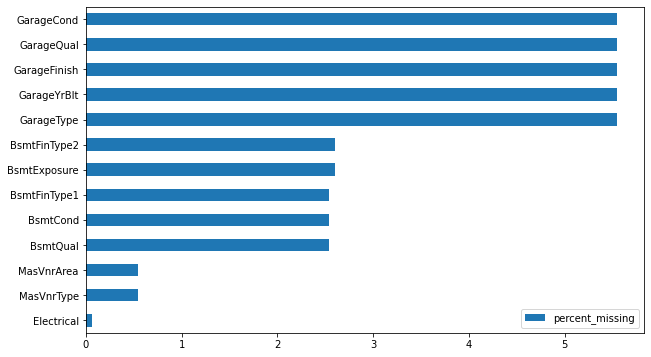

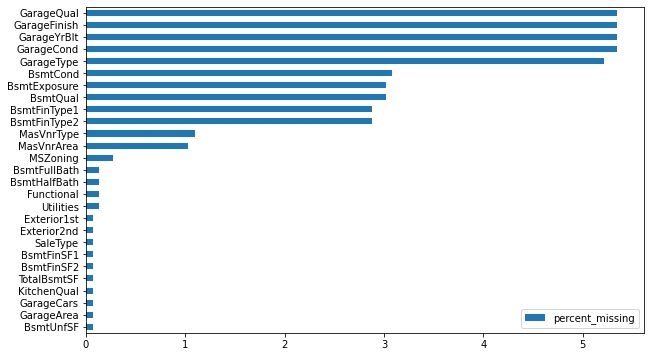

In [26]:
( training_data.isnull().sum() * 100 / len(training_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));
( testing_data.isnull().sum() * 100 / len(testing_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));

*   **GaragCond,GarageQual,GarageFin,GaragYrBlt** have the same missing number and this is logial, because they are all connected with each other.

In [27]:
# accprding to the description of this feature "NA" means No Pool
training_data["GarageFinish"] = training_data["GarageFinish"].fillna("NA")
testing_data["GarageFinish"] = testing_data["GarageFinish"].fillna("NA")


# accprding to the description of this feature "NA" means No Pool
training_data["GarageQual"] = training_data["GarageQual"].fillna("NA")
testing_data["GarageQual"] = testing_data["GarageQual"].fillna("NA")


#according to the description of this feature "NA"	means there is no miscellaneous feature not covered in other categories
training_data["GarageType"] = training_data["GarageType"].fillna("NA")
testing_data["GarageType"] = testing_data["GarageType"].fillna("NA")

#according to the description of this feature "NA"	means there is No Fence
training_data["GarageCond"] = training_data["GarageCond"].fillna("NA")
testing_data["GarageCond"] = testing_data["GarageCond"].fillna("NA")


#according to the description of this feature "NA"	means there is No Fence
training_data["GarageYrBlt"] = training_data["GarageYrBlt"].fillna("NA")
testing_data["GarageYrBlt"] = testing_data["GarageYrBlt"].fillna("NA")


#according to the description of this feature "NA"	means there is No Fence
training_data["GarageArea"] = training_data["GarageArea"].fillna(0)
testing_data["GarageArea"] = testing_data["GarageArea"].fillna(0)


#according to the description of this feature "NA"	means there is No Fence
training_data["GarageCars"] = training_data["GarageCars"].fillna(0)
testing_data["GarageCars"] = testing_data["GarageCars"].fillna(0)



 

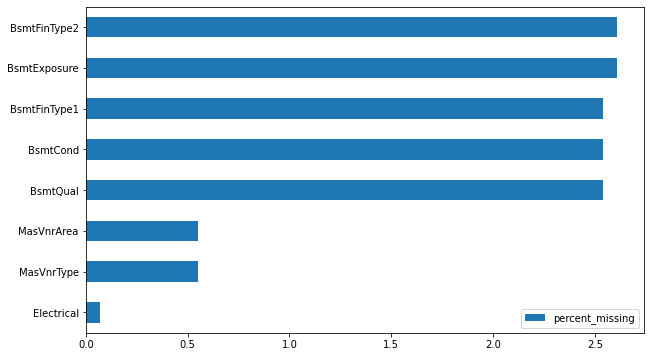

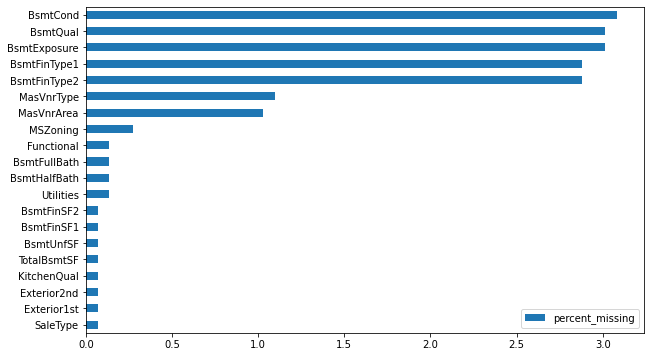

In [ ]:
( training_data.isnull().sum() * 100 / len(training_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));
( testing_data.isnull().sum() * 100 / len(testing_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));

*   **BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath** have the same missing number and this is logial, because they are all connected with each other.

In [28]:
# accprding to the description of this feature "NA" means No Pool
training_data["BsmtFinSF1"] = training_data["BsmtFinSF1"].fillna(0)
testing_data["BsmtFinSF1"] = testing_data["BsmtFinSF1"].fillna(0)

# accprding to the description of this feature "NA" means No Pool
training_data["BsmtFinSF2"] = training_data["BsmtFinSF2"].fillna(0)
testing_data["BsmtFinSF2"] = testing_data["BsmtFinSF2"].fillna(0)

#according to the description of this feature "NA"	means there is no miscellaneous feature not covered in other categories
training_data["BsmtUnfSF"] = training_data["BsmtUnfSF"].fillna(0)
testing_data["BsmtUnfSF"] = testing_data["BsmtUnfSF"].fillna(0)

#according to the description of this feature "NA"	means there is No Fence
training_data["TotalBsmtSF"] = training_data["TotalBsmtSF"].fillna(0)
testing_data["TotalBsmtSF"] = testing_data["TotalBsmtSF"].fillna(0)

#according to the description of this feature "NA"	means there is No Fence
training_data["BsmtFullBath"] = training_data["BsmtFullBath"].fillna(0)
testing_data["BsmtFullBath"] = testing_data["BsmtFullBath"].fillna(0)

#according to the description of this feature "NA"	means there is No Fence
training_data["BsmtHalfBath"] = training_data["BsmtHalfBath"].fillna(0)
testing_data["BsmtHalfBath"] = testing_data["BsmtHalfBath"].fillna(0)

#according to the description of this feature "NA"	means there is No Fence
training_data["BsmtQual"] = training_data["BsmtQual"].fillna("NA")
testing_data["BsmtQual"] = testing_data["BsmtQual"].fillna("NA")

#according to the description of this feature "NA"	means there is No Fence
training_data["BsmtCond"] = training_data["BsmtCond"].fillna("NA")
testing_data["BsmtCond"] = testing_data["BsmtCond"].fillna("NA")

#according to the description of this feature "NA"	means there is No Fence
training_data["BsmtExposure"] = training_data["BsmtExposure"].fillna("NA")
testing_data["BsmtExposure"] = testing_data["BsmtExposure"].fillna("NA")

#according to the description of this feature "NA"	means there is No Fence
training_data["BsmtFinType1"] = training_data["BsmtFinType1"].fillna("NA")
testing_data["BsmtFinType1"] = testing_data["BsmtFinType1"].fillna("NA")

#according to the description of this feature "NA"	means there is No Fence
training_data["BsmtFinType2"] = training_data["BsmtFinType2"].fillna("NA")
testing_data["BsmtFinType2"] = testing_data["BsmtFinType2"].fillna("NA")
 

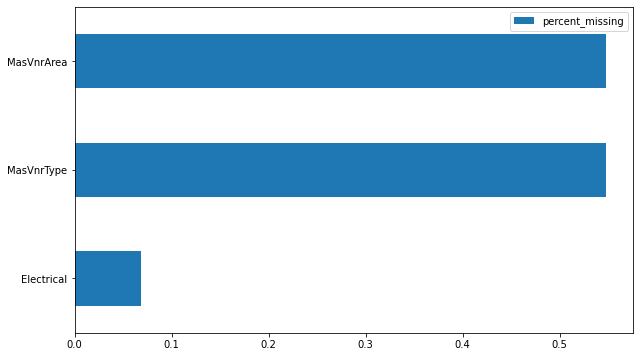

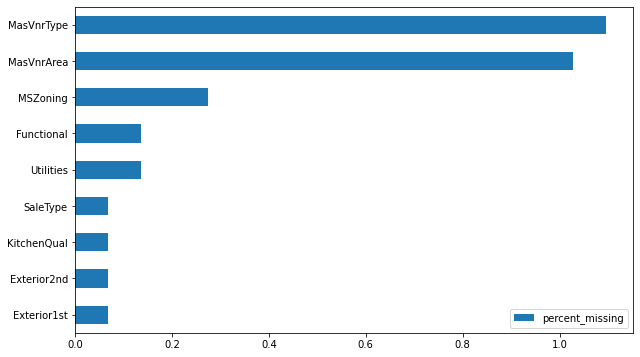

In [29]:
( training_data.isnull().sum() * 100 / len(training_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));
( testing_data.isnull().sum() * 100 / len(testing_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));

*   **MasVnrType,MasVnrArea** have the same missing number and this is logial, because they are all connected with each other.

In [30]:
#according to the description of this feature "NA"	means there is No Fence
training_data["MasVnrType"] = training_data["MasVnrType"].fillna("NA")
testing_data["MasVnrType"] = testing_data["MasVnrType"].fillna("NA")

#according to the description of this feature "NA"	means there is No Fence
training_data["MasVnrArea"] = training_data["MasVnrArea"].fillna(0)
testing_data["MasVnrArea"] = testing_data["MasVnrArea"].fillna(0)

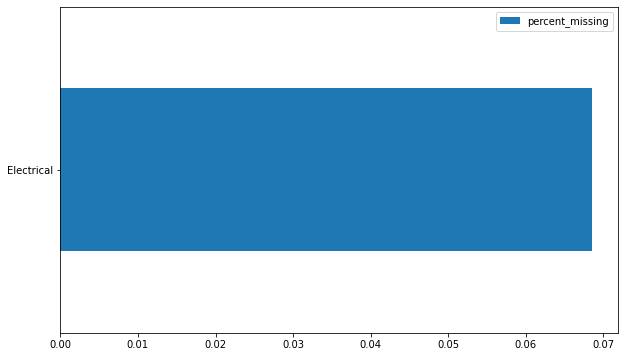

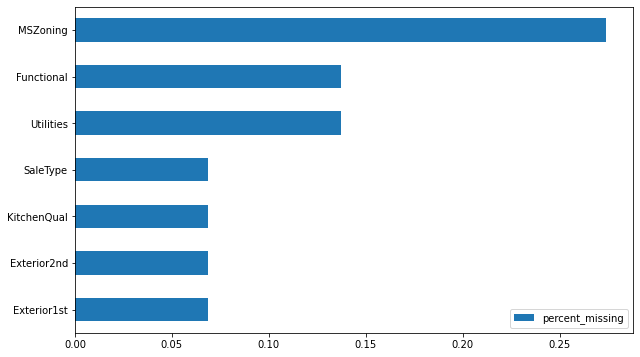

In [31]:
( training_data.isnull().sum() * 100 / len(training_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));
( testing_data.isnull().sum() * 100 / len(testing_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));

In [32]:
training_data['Electrical'] = training_data['Electrical'].fillna(training_data['Electrical'].mode()[0])


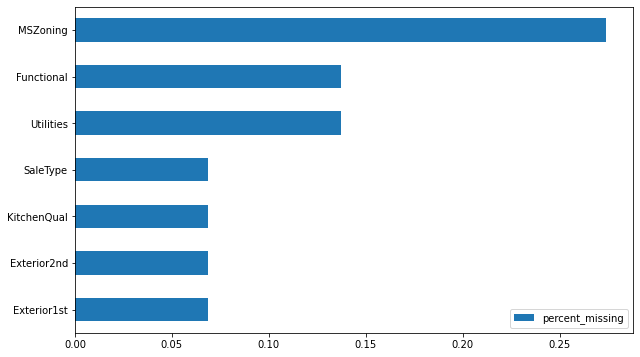

In [33]:
#( training_data.isnull().sum() * 100 / len(training_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));
( testing_data.isnull().sum() * 100 / len(testing_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));

In [ ]:
#( training_data.isnull().sum() * 100 / len(training_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));
#( testing_data.isnull().sum() * 100 / len(testing_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));

In [34]:
testing_data["MSZoning"].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [35]:
testing_data['MSZoning'] = testing_data['MSZoning'].fillna(testing_data['MSZoning'].mode()[0])

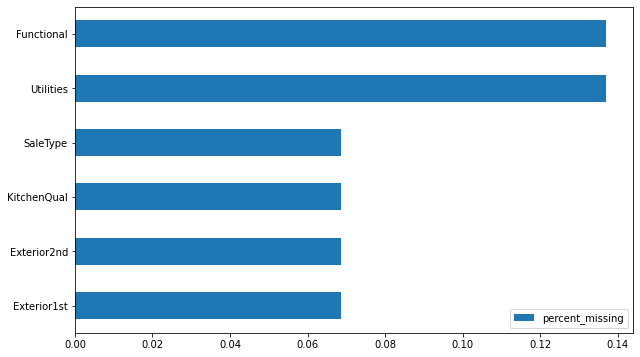

In [36]:
#( training_data.isnull().sum() * 100 / len(training_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));
( testing_data.isnull().sum() * 100 / len(testing_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));

In [37]:
testing_data["Functional"].value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [38]:
testing_data["Functional"] = testing_data["Functional"].fillna("Typ")

In [ ]:
#( training_data.isnull().sum() * 100 / len(training_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));
#( testing_data.isnull().sum() * 100 / len(testing_data) ) .to_frame(name='percent_missing').query('percent_missing>0').sort_values(by='percent_missing', ascending=True).plot.barh( figsize=(10,6));

In [39]:
testing_data["Utilities"].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [40]:
testing_data = testing_data.drop(['Utilities'], axis=1)

In [41]:
testing_data["SaleType"].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [42]:
testing_data['SaleType'] = testing_data['SaleType'].fillna(testing_data['SaleType'].mode()[0])

In [43]:
testing_data["KitchenQual"].value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [44]:
testing_data['KitchenQual'] = testing_data['KitchenQual'].fillna(testing_data['KitchenQual'].mode()[0])

In [45]:
testing_data["Exterior2nd"].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [46]:
testing_data['Exterior1st'] = testing_data['Exterior1st'].fillna(testing_data['Exterior1st'].mode()[0])
testing_data['Exterior2nd'] = testing_data['Exterior2nd'].fillna(testing_data['Exterior2nd'].mode()[0])

# **correlation with salceprice**

In [47]:
cor =  training_data.corr()
criterion = training_data["SalePrice"]

threshold = 0.3


cor_criterion = abs(cor["SalePrice"])

relevant_features = cor_criterion[cor_criterion > threshold]
relevant_features = relevant_features.reset_index()
relevant_features.columns = ['Variables', 'Correlation']
relevant_features = relevant_features.sort_values(by='Correlation', ascending=False)
relevant_features



,Variables,Correlation
16,SalePrice,1.00
8,GrLivArea,0.71
12,GarageCars,0.64
13,GarageArea,0.62
5,TotalBsmtSF,0.61
6,1stFlrSF,0.61
9,FullBath,0.56
10,TotRmsAbvGrd,0.53
1,YearBuilt,0.52
2,YearRemodAdd,0.51


In [ ]:
#training_data.drop(relevant_features["Variables"].tolist(),axis=1, inplace = True)
#testing_data.drop(relevant_features["Variables"].tolist(),axis=1, inplace = True)


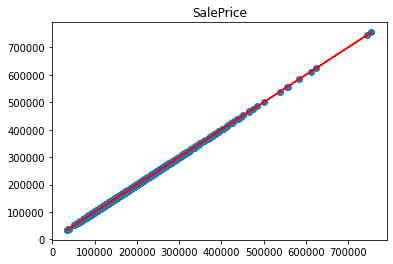

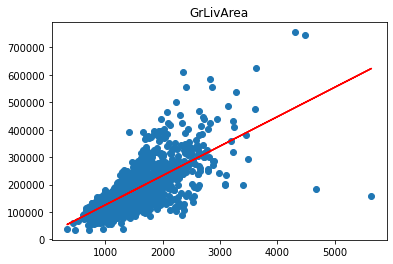

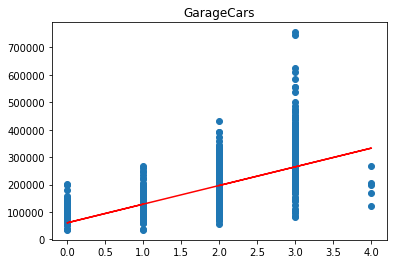

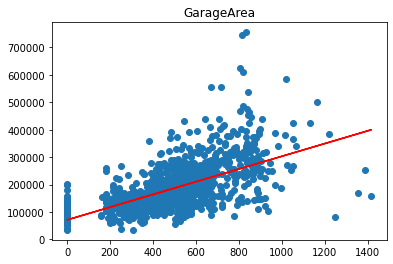

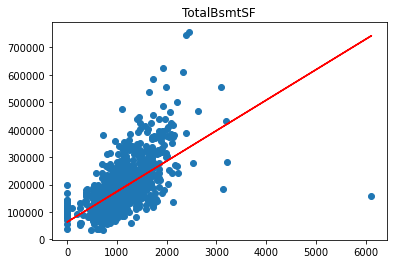

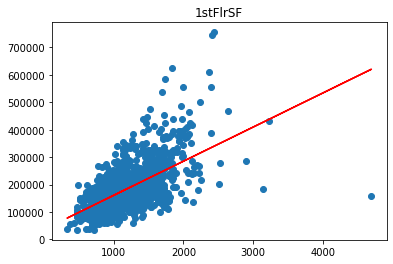

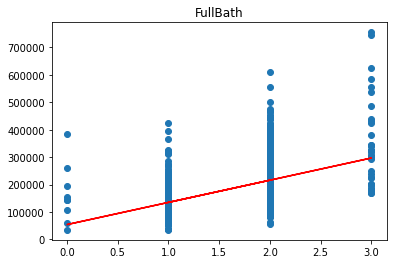

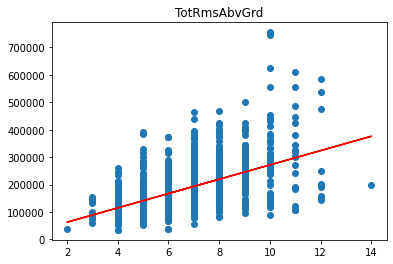

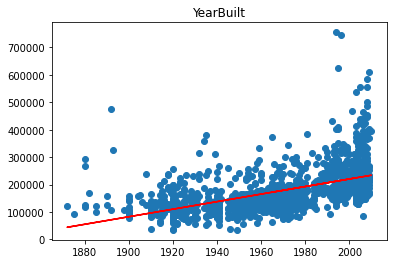

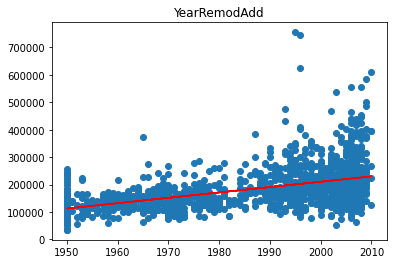

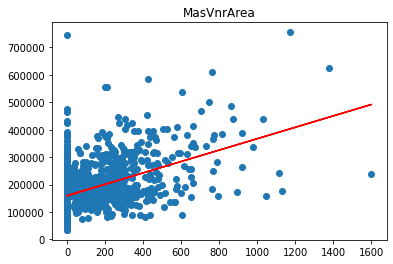

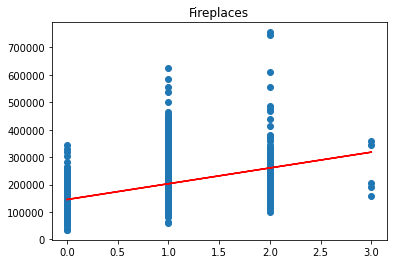

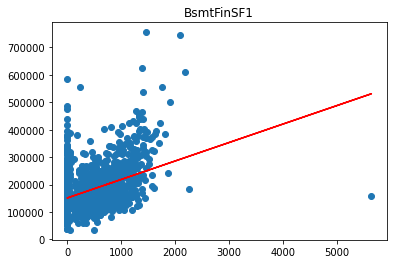

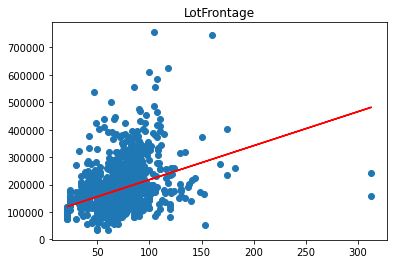

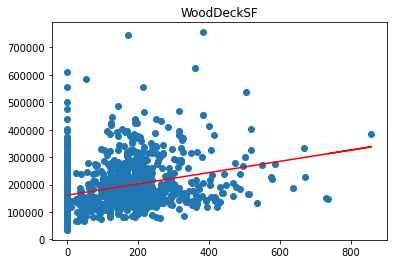

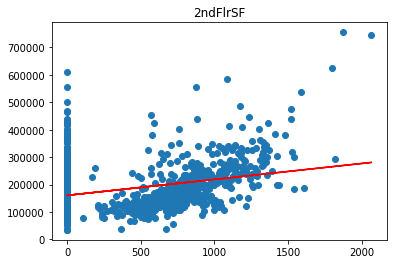

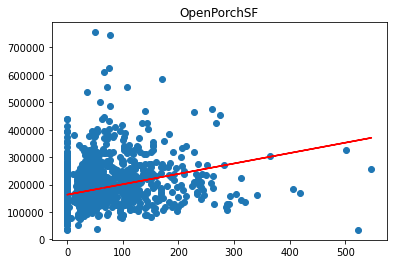

In [48]:
for col in relevant_features["Variables"].tolist():
    plt.scatter(training_data[col], training_data["SalePrice"])
    plt.title(col)
    m, b = np.polyfit(training_data[col],training_data["SalePrice"], 1)

    #m = slope, b=intercept


    plt.plot(training_data[col], m*training_data[col] + b , color='red')
   # plt.plot(col, training_data["SalePrice"], color='red')
    plt.show()

# **Handling skekwed data**

In [ ]:
#all_data = pd.concat([training_data , testing_data], ignore_index=True)
#all_data = pd.get_dummies(all_data, columns=all_data.select_dtypes(include="object").columns )

In [49]:
train_data = training_data.iloc[:training_data.shape[0],:-1]
saleprice = np.log1p(training_data['SalePrice'])

In [50]:
skew_feats = train_data[train_data.select_dtypes(include=numerics).columns].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_feats})
skewness = skewness.loc[skewness['Skew']>0.75].reset_index()
skewness['index'] = skewness['index'].apply(str)
skewness

,index,Skew
0,MiscVal,24.48
1,PoolArea,14.83
2,LotArea,12.21
3,3SsnPorch,10.30
4,LowQualFinSF,9.01
5,KitchenAbvGr,4.49
6,BsmtFinSF2,4.26
7,ScreenPorch,4.12
8,BsmtHalfBath,4.10
9,EnclosedPorch,3.09


In [51]:
for feat in skewness['index']:
     train_data[feat] = boxcox1p(train_data[feat], stats.boxcox_normmax(train_data[feat] + 1))

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


# **Modeling**

In [52]:
train_data = pd.get_dummies(train_data, columns=train_data.select_dtypes(include="object").columns )

In [53]:
train_data.shape

(1460, 444)

In [54]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_data.values)
    rmse= np.sqrt(-cross_val_score(model, train_data.values, saleprice, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [55]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [56]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1262 (0.0197)



In [58]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [65]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

ElasticNet score: 0.1262 (0.0196)

Kernel Ridge score: 0.2639 (0.0769)

Gradient Boosting score: 0.1268 (0.0129)

Xgboost score: 0.1269 (0.0098)

LGBM score: 0.1273 (0.0087)



In [ ]:
#def cat1(value):
#    if value >= 34900 and value < 129975:
#        return "low"
#    elif value >= 129975 and value <163000 :
#        return "medium"
#    elif value >= 163000 and value <214000 :
#        return "high"
#    elif value >= 214000 and value <755000 :
#        return "very high"
    
#training_data["salepricecat"] = training_data.apply(lambda row: cat1(row['SalePrice']), axis = 1)